In [9]:
import csv

import pandas as pd

mmlu_num_maj_df = pd.read_csv(
    "../data/mmlu_pro_stem_w_numerical_maj_w_entropyphi4.tsv",
    sep="\t",
    header=0,
    quoting=csv.QUOTE_NONE,
    quotechar="",
    escapechar="\\",
)


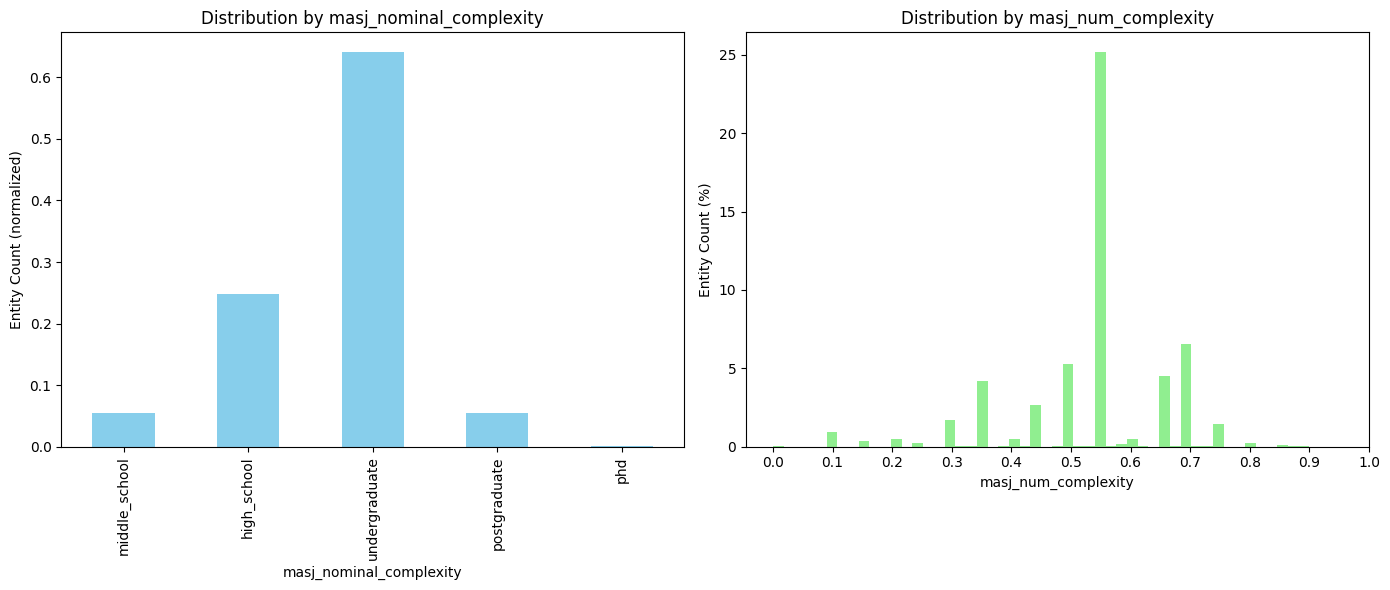

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot distribution by masj_nominal_complexity
mmlu_num_maj_df["masj_nominal_complexity"].value_counts(normalize=True).loc[
    ["middle_school", "high_school", "undergraduate", "postgraduate", "phd"]
].plot(kind="bar", ax=axes[0], color="skyblue")
axes[0].set_title("Distribution by masj_nominal_complexity")
axes[0].set_xlabel("masj_nominal_complexity")
axes[0].set_ylabel("Entity Count (normalized)")

# Plot distribution by masj_num_complexity as a histogram
mmlu_num_maj_df["masj_num_complexity"].plot(kind="hist", bins=50, ax=axes[1], color="lightgreen", density=True)
axes[1].set_xticks([x * 0.1 for x in range(0, 11)])
axes[1].set_title("Distribution by masj_num_complexity")
axes[1].set_xlabel("masj_num_complexity")
axes[1].set_ylabel("Entity Count (%)")

plt.tight_layout()
plt.show()

In [36]:
print(
    mmlu_num_maj_df.value_counts("masj_nominal_complexity").loc[
        ["middle_school", "high_school", "undergraduate", "postgraduate", "phd"]
    ]
)

# Generate 5 groups for "masj_num_complexity" from 0 to 1
masj_num_complexity_group = pd.cut(
    mmlu_num_maj_df["masj_num_complexity"],
    bins=[0, 0.2, 0.4, 0.6, 0.8, 1],
    labels=["middle_school", "high_school", "undergraduate", "postgraduate", "phd"],
)
# Count values in each group
group_counts = masj_num_complexity_group.value_counts().sort_index()
print(group_counts)


masj_nominal_complexity
middle_school     658
high_school      2989
undergraduate    7702
postgraduate      653
phd                11
Name: count, dtype: int64
masj_num_complexity
middle_school     383
high_school      1453
undergraduate    7352
postgraduate     2779
phd                42
Name: count, dtype: int64


<Axes: xlabel='entropy_value_phi3', ylabel='Count'>

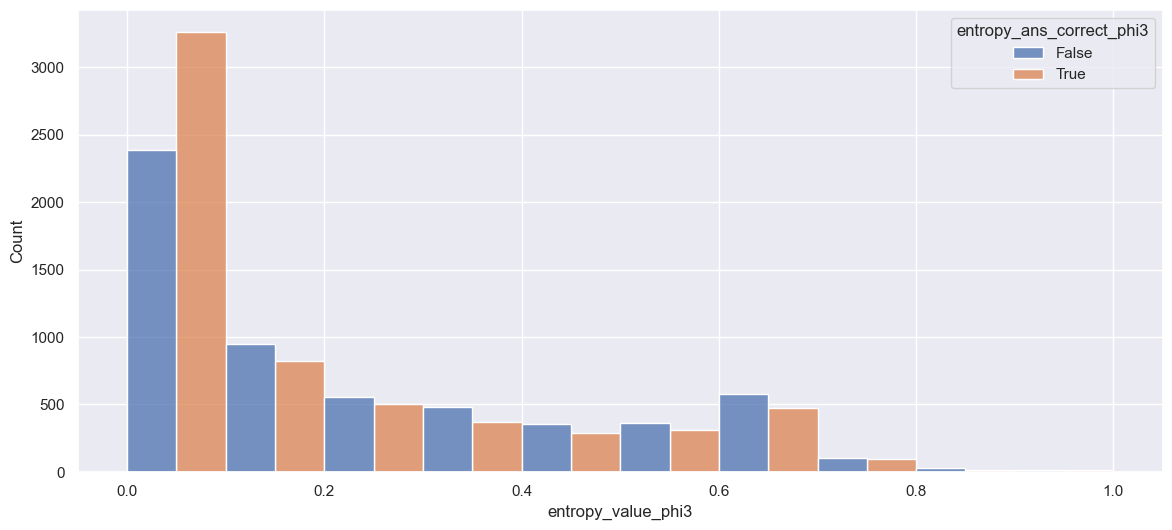

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(14, 6))
sns.histplot(
    mmlu_num_maj_df,
    x="entropy_value_phi3",
    bins=[x * 0.1 for x in range(0, 11)],
    hue="entropy_ans_correct_phi3",
    multiple="dodge",
)

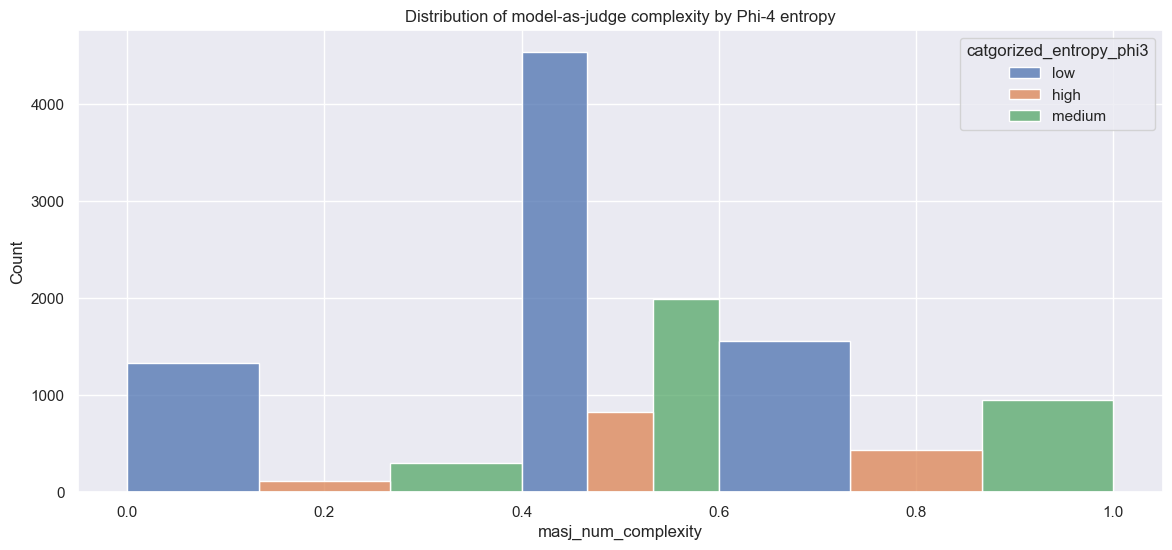

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

medium_phi4_entropy = mmlu_num_maj_df[
    (mmlu_num_maj_df["entropy_value_phi3"] > 0.2) & (mmlu_num_maj_df["entropy_value_phi3"] < 0.6)
]
high_phi4_entropy = mmlu_num_maj_df[(mmlu_num_maj_df["entropy_value_phi3"] >= 0.6)]


mmlu_num_maj_df["catgorized_entropy_phi3"] = "low"

mmlu_num_maj_df.loc[
    medium_phi4_entropy.index,
    "catgorized_entropy_phi3",
] = "medium"
mmlu_num_maj_df.loc[high_phi4_entropy.index, "catgorized_entropy_phi3"] = "high"

plt.figure(figsize=(14, 6))
g = sns.histplot(
    mmlu_num_maj_df, x="masj_num_complexity", hue="catgorized_entropy_phi3", bins=[0, 0.4, 0.6, 1], multiple="dodge"
)
g.title.set_text("Distribution of model-as-judge complexity by Phi-4 entropy")

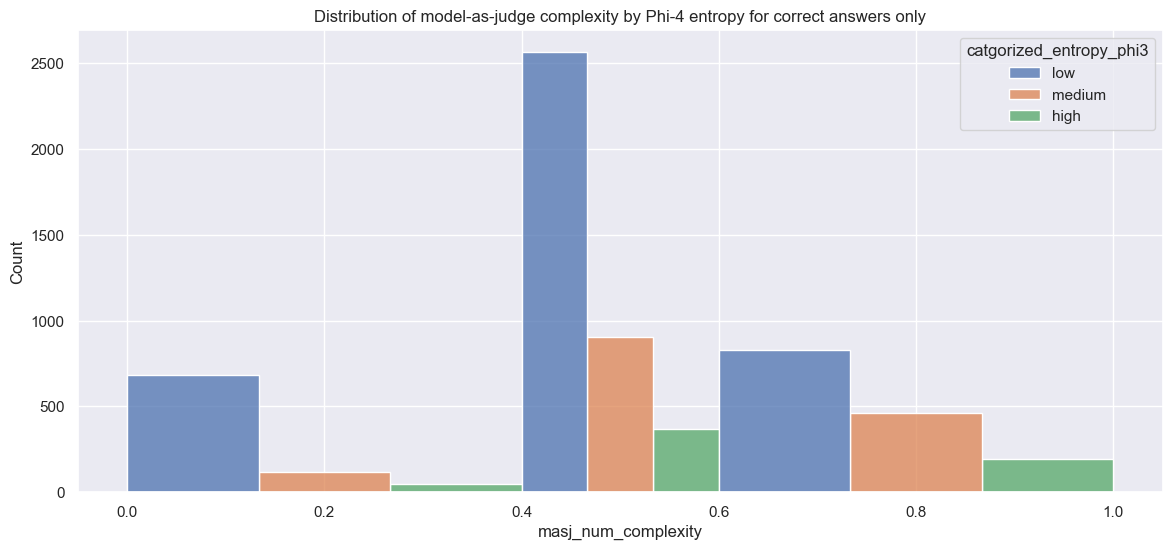

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

mmlu_num_maj_df_true_only = mmlu_num_maj_df[mmlu_num_maj_df["entropy_ans_correct_phi3"] == True].copy(deep=True)

medium_phi4_entropy = mmlu_num_maj_df_true_only[
    (mmlu_num_maj_df_true_only["entropy_value_phi3"] > 0.2) & (mmlu_num_maj_df_true_only["entropy_value_phi3"] < 0.6)
]
high_phi4_entropy = mmlu_num_maj_df_true_only[(mmlu_num_maj_df_true_only["entropy_value_phi3"] >= 0.6)]


mmlu_num_maj_df_true_only["catgorized_entropy_phi3"] = "low"

mmlu_num_maj_df_true_only.loc[
    medium_phi4_entropy.index,
    "catgorized_entropy_phi3",
] = "medium"
mmlu_num_maj_df_true_only.loc[high_phi4_entropy.index, "catgorized_entropy_phi3"] = "high"

plt.figure(figsize=(14, 6))
g = sns.histplot(
    mmlu_num_maj_df_true_only,
    x="masj_num_complexity",
    hue="catgorized_entropy_phi3",
    bins=[0, 0.4, 0.6, 1],
    multiple="dodge",
)
g.title.set_text("Distribution of model-as-judge complexity by Phi-4 entropy for correct answers only")

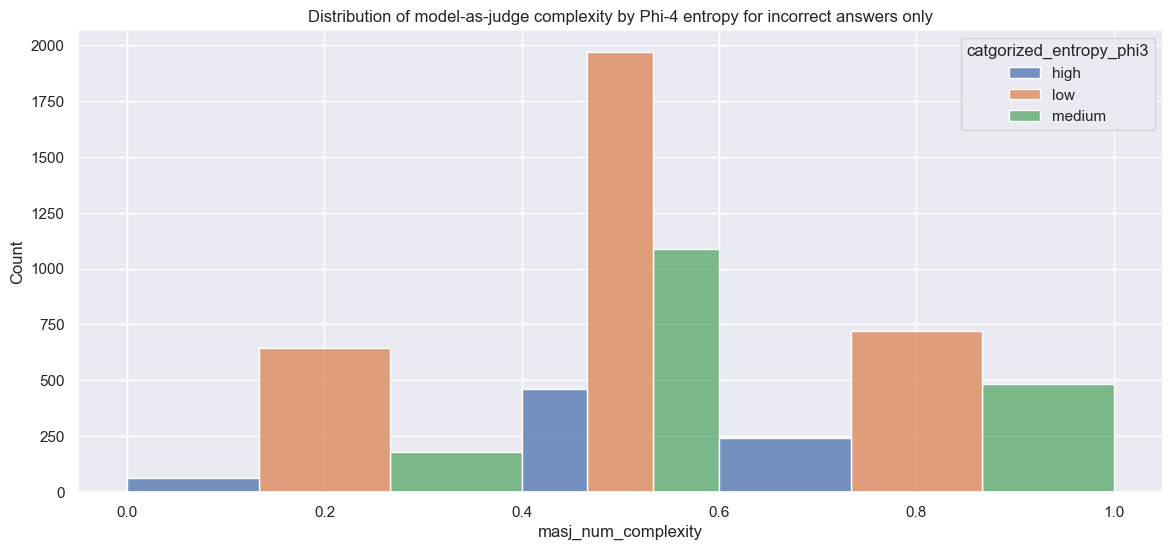

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

mmlu_num_maj_df_false_only = mmlu_num_maj_df[mmlu_num_maj_df["entropy_ans_correct_phi3"] == False].copy(deep=True)

medium_phi4_entropy = mmlu_num_maj_df_false_only[
    (mmlu_num_maj_df_false_only["entropy_value_phi3"] > 0.2) & (mmlu_num_maj_df_false_only["entropy_value_phi3"] < 0.6)
]
high_phi4_entropy = mmlu_num_maj_df_false_only[(mmlu_num_maj_df_false_only["entropy_value_phi3"] >= 0.6)]


mmlu_num_maj_df_false_only["catgorized_entropy_phi3"] = "low"

mmlu_num_maj_df_false_only.loc[
    medium_phi4_entropy.index,
    "catgorized_entropy_phi3",
] = "medium"
mmlu_num_maj_df_false_only.loc[high_phi4_entropy.index, "catgorized_entropy_phi3"] = "high"

plt.figure(figsize=(14, 6))
g = sns.histplot(
    mmlu_num_maj_df_false_only,
    x="masj_num_complexity",
    hue="catgorized_entropy_phi3",
    bins=[0, 0.4, 0.6, 1],
    multiple="dodge",
)
g.title.set_text("Distribution of model-as-judge complexity by Phi-4 entropy for incorrect answers only")